In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [2]:
df = pd.read_csv("baseball_hof.csv")

In [3]:
df

,Year,Name,position,Primary team,method,vote_percentage,career_start,career_end
0,1936,Ty Cobb,CF,Detroit Tigers,BBWAA,98.23,1905.0,1928.0
1,1936,Walter Johnson,P,Washington Senators,BBWAA,83.63,1907.0,1927.0
2,1936,Christy Mathewson,P,New York Giants,BBWAA,90.71,1900.0,1916.0
3,1936,Babe Ruth,RF,New York Yankees,BBWAA,95.13,1914.0,1935.0
4,1936,Honus Wagner,SS,Pittsburgh Pirates,BBWAA,95.13,1897.0,1917.0
...,...,...,...,...,...,...,...,...
346,2025,CC Sabathia,P,New York Yankees,BBWAA,86.80,2001.0,2019.0
347,2025,Ichiro Suzuki,RF,Seattle Mariners,BBWAA,99.75,2001.0,2019.0
348,2025,Billy Wagner,P,Houston Astros,BBWAA,82.50,1995.0,2010.0
349,2025,Dick Allen,1B,Philadelphia Phillies,VC (CLB),81.30,1963.0,1977.0


In [4]:
df.isna().sum()

Year                 0
Name                 0
position             0
Primary team         0
method               0
vote_percentage    170
career_start         4
career_end           4
dtype: int64

In [5]:
df[df["career_start"].isna()]

,Year,Name,position,Primary team,method,vote_percentage,career_start,career_end
14,1938,Alexander Cartwright,PIO,Knickerbocker Base Ball Club,VC,NaN,NaN,NaN
15,1938,Henry Chadwick,PIO,—,VC,NaN,NaN,NaN
275,2006,Sol White,EXEC,Philadelphia Giants,SCNL,NaN,NaN,NaN
315,2017,John Schuerholz,EXEC,Atlanta Braves,VC (TG),100.0,NaN,NaN


Interesting finding here: John Schuerholz is a missing value because he is presently working in the league.

In [6]:
df.loc[315, ["career_start", "career_end"]] = [1966, 2025]

In [7]:
df["career_end"] = pd.to_numeric(df["career_end"], errors="coerce")
df["career_start"] = pd.to_numeric(df["career_start"], errors="coerce")


In [8]:
df

,Year,Name,position,Primary team,method,vote_percentage,career_start,career_end
0,1936,Ty Cobb,CF,Detroit Tigers,BBWAA,98.23,1905.0,1928.0
1,1936,Walter Johnson,P,Washington Senators,BBWAA,83.63,1907.0,1927.0
2,1936,Christy Mathewson,P,New York Giants,BBWAA,90.71,1900.0,1916.0
3,1936,Babe Ruth,RF,New York Yankees,BBWAA,95.13,1914.0,1935.0
4,1936,Honus Wagner,SS,Pittsburgh Pirates,BBWAA,95.13,1897.0,1917.0
...,...,...,...,...,...,...,...,...
346,2025,CC Sabathia,P,New York Yankees,BBWAA,86.80,2001.0,2019.0
347,2025,Ichiro Suzuki,RF,Seattle Mariners,BBWAA,99.75,2001.0,2019.0
348,2025,Billy Wagner,P,Houston Astros,BBWAA,82.50,1995.0,2010.0
349,2025,Dick Allen,1B,Philadelphia Phillies,VC (CLB),81.30,1963.0,1977.0


In [9]:
df["position"] = df["position"].apply(lambda x: "EXEC" if x == "EXEC/PIO" else x)

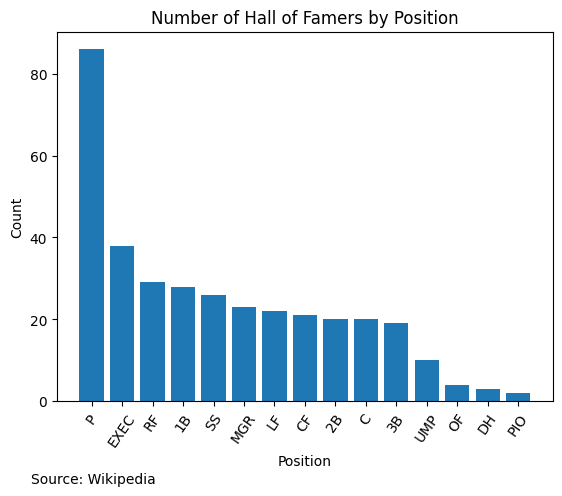

In [60]:
counts = df["position"].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks(rotation=55, ha="center", va = "top")
plt.xlabel("Position")
plt.ylabel("Count")
plt.title("Number of Hall of Famers by Position")
plt.text(-2,-20, s="Source: Wikipedia")

plt.savefig("pos_bar.png", bbox_inches='tight')

In [11]:
def sort_positions(st):
    if st in ["RF", "LF", "CF", "OF"]:
        return "OF"
    elif st in ["1B", "2B", "3B", "SS", "C"]:
        return "IF"
    elif st in ["EXEC", "MGR", "PIO"]:
        return "MGR"
    else:
        return st

df["position_group"] = df["position"].apply(lambda x: sort_positions(x))

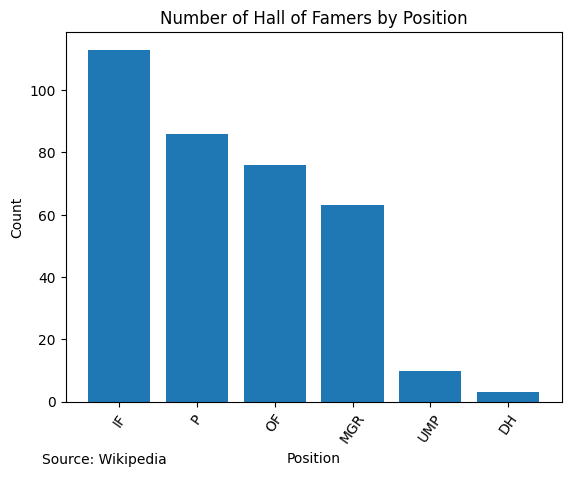

In [61]:
counts = df["position_group"].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks(rotation=55, ha="center", va = "top")
plt.xlabel("Position")
plt.ylabel("Count")
plt.title("Number of Hall of Famers by Position")
plt.text(-1,-20, s="Source: Wikipedia")

plt.savefig("pos_group_bar.png", bbox_inches='tight')

In [13]:
df["method"] = df["method"].str.replace(r"\(.*\)", "", regex=True)
df["method"] = df["method"].str.strip()

In [14]:
dfg = df.groupby("method")
dfg["vote_percentage"].mean()

method
BBWAA    85.322482
NLC      87.963333
SCNL           NaN
VC       86.593824
Name: vote_percentage, dtype: float64

In [15]:
df["career_span"] = df["career_end"] - df["career_start"]

In [16]:
df[df["career_end"]==9653]
df.loc[116, "career_end"] = 1965

In [17]:
df["career_span"] = df["career_end"] - df["career_start"]

In [18]:
df["career_span"].mean()

np.float64(19.439655172413794)

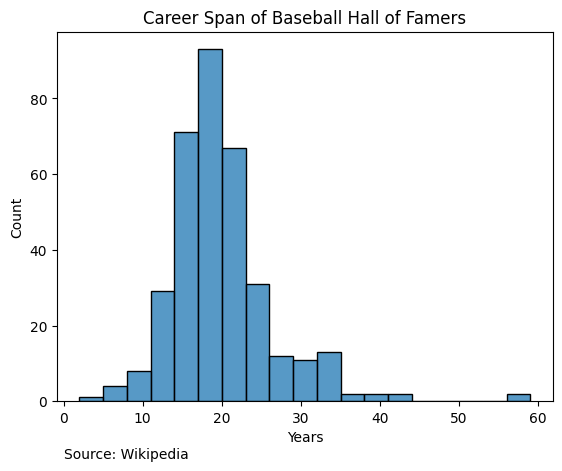

In [62]:
sns.histplot(df["career_span"], binwidth = 3)

plt.xlabel("Years")
plt.title("Career Span of Baseball Hall of Famers")
plt.text(0, -15, "Source: Wikipedia")
plt.savefig("career_span_hist.png", bbox_inches='tight')

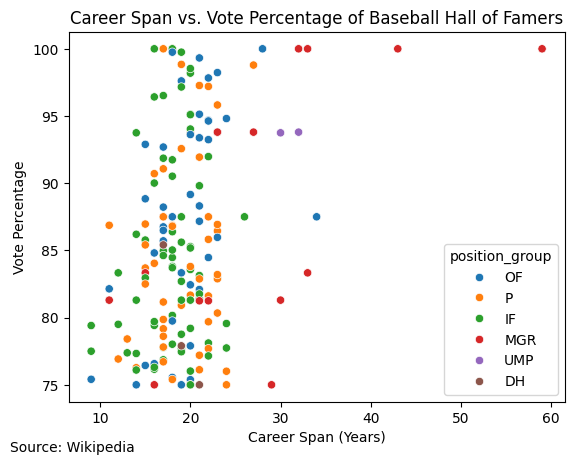

In [63]:
sns.scatterplot(df, x="career_span", y="vote_percentage", hue="position_group")
plt.xlabel("Career Span (Years)")
plt.ylabel("Vote Percentage")
plt.title("Career Span vs. Vote Percentage of Baseball Hall of Famers")
plt.text(0, 70, "Source: Wikipedia")
plt.savefig("career_votes.png", bbox_inches='tight')

In [75]:
df[["career_span", "vote_percentage"]].corr()

,career_span,vote_percentage
career_span,1.000000,0.332195
vote_percentage,0.332195,1.000000


In [43]:
def trim_ints(i):
    while i >= 10000:
        i //= 10
    return i

df["Year"]=df["Year"].apply(lambda x: trim_ints(x))

In [55]:
counts = df["Primary team"].value_counts()

counts.head(35)

Primary team
New York Yankees           25
—                          24
New York Giants            20
St. Louis Cardinals        17
Chicago Cubs               14
Pittsburgh Pirates         14
Cleveland Indians          13
Chicago White Sox          13
Boston Red Sox             12
Philadelphia Phillies      11
Brooklyn Dodgers           11
Detroit Tigers             10
Cincinnati Reds             9
Kansas City Monarchs        7
Minnesota Twins             7
Philadelphia Athletics      6
Los Angeles Dodgers         6
Atlanta Braves              6
San Francisco Giants        5
Washington Senators         5
Newark Eagles               5
Baltimore Orioles           5
Boston Beaneaters           4
Homestead Grays             4
Chicago American Giants     4
Oakland Athletics           3
Chicago White Stockings     3
Buffalo Bisons              3
Houston Astros              3
Seattle Mariners            3
Montreal Expos              3
New York Lincoln Giants     2
New York Mets              

In [73]:
df["career_span"].max()

np.float64(59.0)

In [74]:
df[df["career_span"]==59]

,Year,Name,position,Primary team,method,vote_percentage,career_start,career_end,position_group,career_span
315,2017,John Schuerholz,EXEC,Atlanta Braves,VC,100.0,1966.0,2025.0,MGR,59.0
